In [1]:
import pandas as pd
import os
from scipy import stats
import numpy as np

results_dir = '../data/results/empathy_eval_results/'
files = ['preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt', 'preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt', 'preds_dlrxxx_zephyr-7b-sft-full_specificity.txt']

In [2]:
df1 = pd.read_csv(os.path.join(results_dir, 'preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt'), sep='~')
df2 = pd.read_csv(os.path.join(results_dir, 'preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt'), sep='~')
df3 = pd.read_csv(os.path.join(results_dir, 'preds_dlrxxx_zephyr-7b-sft-full_specificity.txt'), sep='~')

In [3]:
df1.chat_templates[0]

"<|system|>\nYou are a friendly assistant, who provides empathetic responses to the user. The input contains previous turn of the dialog, where each utterance is prefaced with tags <|user|>, or <|assistant|>. Be empathetic and precise. Make sure to give responses that make dialogue flow. Avoid repeating the prompt.</s>\n<|user|>\nYeah about 10 years ago I had a horrifying experience. It was 100% their fault but they hit the water barrels and survived. They had no injuries but they almost ran me off the road.</s>\n<|assistant|>\nDid you suffer any injuries?</s>\n<|user|>\nNo I wasn't hit. It turned out they were drunk. I felt guilty but realized it was his fault.</s>\n<|assistant|>\n"

In [4]:
df1

,Unnamed: 0,chat_templates,gen_targets,prevs,emotions,gens,specificity
0,0,"<|system|>\nYou are a friendly assistant, who ...",Why did you feel guilty? People really shouldn...,No I wasn't hit. It turned out they were drunk...,guilty,That's good that you didn't get hurt.,0.183983
1,1,"<|system|>\nYou are a friendly assistant, who ...",you got a great husband,"It was, and he does that type of thing a lot.",surprised,"That's great, I wish my husband would do that",0.198119
2,2,"<|system|>\nYou are a friendly assistant, who ...",It's worth it to consider. I pay less than hal...,Maybe A move out of my state would be the answ...,trusting,I hope you can find a place that is more affor...,0.244100
3,3,"<|system|>\nYou are a friendly assistant, who ...",I have been married for 19 years and we have b...,"My girlfriend, How about you? do you have a pa...",faithful,I do not have a partner. I am single.,0.215458
4,4,"<|system|>\nYou are a friendly assistant, who ...",You have been very lucky. You should keep thei...,Surprisingly it's been a painless process. I'm...,trusting,That's great. I hope you enjoy your new home.,0.217794
...,...,...,...,...,...,...,...
2535,2535,"<|system|>\nYou are a friendly assistant, who ...",Well that's good. What did you find?,"No, she is fine. I had to find something else ...",annoyed,I am sorry to hear that. I hope you find somet...,0.216682
2536,2536,"<|system|>\nYou are a friendly assistant, who ...","Did he do it? Cause if not, I might have need...",I would have totally flipped the circuit break...,annoyed,"Well, I'm glad you didn't have to resort to th...",0.243179
2537,2537,"<|system|>\nYou are a friendly assistant, who ...",I can imagine. Maybe it'll morph into a Super ...,It probably will.,disgusted,I hope you can stop it before it happens again.,0.247419
2538,2538,"<|system|>\nYou are a friendly assistant, who ...","That's too bad. Well, on the bright side, mayb...","Yes it did, unfortunately",ashamed,I'm sorry to hear that. I hope you can get ano...,0.245652


In [5]:
print(df2.chat_templates[0])

<|system|>
You are a friendly assistant, who provides empathetic responses to the user. The input contains previous turn of the dialog, where each utterance is prefaced with tags <|user|>, or <|assistant|>. Be empathetic and precise. Make sure to give responses that make dialogue flow. Avoid repeating the prompt.</s>
<|user|>
Yeah about 10 years ago I had a horrifying experience. It was 100% their fault but they hit the water barrels and survived. They had no injuries but they almost ran me off the road.</s>
<|assistant|>
Did you suffer any injuries?</s>
<|user|>
No I wasn't hit. It turned out they were drunk. I felt guilty but realized it was his fault.</s>
<|assistant|>



In [6]:
print("Variance")

print('model 1', df1['specificity'].var())
print('model 2', df2['specificity'].var())
print('model 3', df3['specificity'].var())

Variance
model 1 0.001936805812244156
model 2 0.003697253683736711
model 3 0.002504549365203262


In [7]:
stats.ttest_ind(df1['specificity'], df2['specificity'], equal_var=False)

TtestResult(statistic=-47.26486191439801, pvalue=0.0, df=4626.312144648669)

In [8]:
df1['specificity'].mean(), df2['specificity'].mean(), df3['specificity'].mean()

(0.22267909646909545, 0.29307254629723895, 0.2993805608721077)

In [9]:
stats.ttest_ind(df1['specificity'], df2['specificity'], alternative='less')

TtestResult(statistic=-47.26486191439801, pvalue=0.0, df=5078.0)

In [10]:
df1[['specificity']].rename(columns={'specificity':'df1'})

,df1
0,0.183983
1,0.198119
2,0.244100
3,0.215458
4,0.217794
...,...
2535,0.216682
2536,0.243179
2537,0.247419
2538,0.245652


In [11]:
specificity_df = pd.concat([df1[['specificity']].rename(columns= {'specificity':'df1'}),df2[['specificity']].rename(columns={'specificity':'df2'}), df3[['specificity']].rename(columns={'specificity':'df3'})], axis=1)
specificity_df

,df1,df2,df3
0,0.183983,0.374588,0.329744
1,0.198119,0.247147,0.258448
2,0.244100,0.298339,0.325729
3,0.215458,0.294622,0.266352
4,0.217794,0.218387,0.273491
...,...,...,...
2535,0.216682,0.278673,0.227164
2536,0.243179,0.366589,0.362967
2537,0.247419,0.259978,0.298492
2538,0.245652,0.369529,0.207603


In [12]:
# specificity_df.boxplot()

In [13]:
df2[df2.specificity == 1]

,Unnamed: 0,chat_templates,gen_targets,prevs,emotions,gens,specificity
951,951,"<|system|>\nYou are a friendly assistant, who ...",Woah plot twist. She brought him along to meet...,"Well, right after she gave me a big hug, she i...",jealous,OHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,1.0


In [14]:
# use trimming because of longtail/outliers: https://academic.oup.com/biomet/article-abstract/61/1/165/264376

stats.ttest_ind(df1['specificity'], df2['specificity'],trim=0.05)

TtestResult(statistic=-50.25107688219272, pvalue=0.0, df=4570.0)

In [15]:
stats.ttest_ind(df1['specificity'], df2['specificity'],permutations=10000,random_state=34)


TtestResult(statistic=-47.26486191439801, pvalue=9.999000099990002e-05, df=nan)

In [16]:
stats.ttest_ind(df1['specificity'], df3['specificity'],permutations=10000,random_state=34)


TtestResult(statistic=-58.00464341980431, pvalue=9.999000099990002e-05, df=nan)

### Deal with outliers

we'll take things within z-score -3 to 3

In [17]:
z_df1 = np.abs(stats.zscore(df1['specificity']))
z_df2 = np.abs(stats.zscore(df2['specificity']))
z_df3 = np.abs(stats.zscore(df3['specificity']))

In [18]:
z_thresh = 3


df1_outliers = z_df1[z_df1 > z_thresh].index 
df2_outliers = z_df1[z_df2 > z_thresh].index 
df3_outliers = z_df1[z_df3 > z_thresh].index 



t-test without outliers

In [19]:
spec_df1_no_outliers = df1[~df1.index.isin(df1_outliers)].specificity
spec_df2_no_outliers = df2[~df2.index.isin(df2_outliers)].specificity
spec_df3_no_outliers = df3[~df3.index.isin(df3_outliers)].specificity

print("variances")
print("w/ outliers", df1.specificity.var(),df2.specificity.var(), df3.specificity.var())
print("w/o outliers", spec_df1_no_outliers.var(),spec_df2_no_outliers.var(), spec_df3_no_outliers.var())

variances
w/ outliers 0.001936805812244156 0.003697253683736711 0.002504549365203262
w/o outliers 0.001568671326963348 0.0030248628461638683 0.002327097650820034


In [20]:
stats.ttest_ind(spec_df1_no_outliers, spec_df2_no_outliers, permutations=10000, random_state=34)

TtestResult(statistic=-51.943061690369944, pvalue=9.999000099990002e-05, df=nan)

In [21]:
stats.ttest_ind(spec_df1_no_outliers, spec_df3_no_outliers, permutations=10000, random_state=34)

TtestResult(statistic=-62.33150588520844, pvalue=9.999000099990002e-05, df=nan)

In [22]:
files[0], files[1], files[2]

('preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt',
 'preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt',
 'preds_dlrxxx_zephyr-7b-sft-full_specificity.txt')

In [23]:
stats.ttest_ind(spec_df2_no_outliers, spec_df3_no_outliers, permutations=10000, random_state=34)

TtestResult(statistic=-5.043231995424769, pvalue=9.999000099990002e-05, df=nan)

### Compare with human

In [24]:
human_df = pd.read_csv('../data/results/empathy_eval_results/human_specificity.txt', sep="~")
human_df

,Unnamed: 0,chat_templates,gen_targets,prevs,emotions,gens,specificity
0,0,"<|system|>\nYou are a friendly assistant, who ...",Why did you feel guilty? People really shouldn...,No I wasn't hit. It turned out they were drunk...,guilty,Thankfully you were okay then. Drunk drivers a...,0.303654
1,1,"<|system|>\nYou are a friendly assistant, who ...",you got a great husband,"It was, and he does that type of thing a lot.",surprised,That is very sweet of him to always get you li...,0.220178
2,2,"<|system|>\nYou are a friendly assistant, who ...",It's worth it to consider. I pay less than hal...,Maybe A move out of my state would be the answ...,trusting,"Exactly, I didn't want to leave my family but ...",0.349959
3,3,"<|system|>\nYou are a friendly assistant, who ...",I have been married for 19 years and we have b...,"My girlfriend, How about you? do you have a pa...",faithful,No I do not. Been single for awhile now. What ...,0.305621
4,4,"<|system|>\nYou are a friendly assistant, who ...",You have been very lucky. You should keep thei...,Surprisingly it's been a painless process. I'm...,trusting,That is great. Sometimes they can make it hard...,0.340205
...,...,...,...,...,...,...,...
2535,2535,"<|system|>\nYou are a friendly assistant, who ...",Well that's good. What did you find?,"No, she is fine. I had to find something else ...",annoyed,"Well, at least your dog did not get sick. Mayb...",0.187269
2536,2536,"<|system|>\nYou are a friendly assistant, who ...","Did he do it? Cause if not, I might have need...",I would have totally flipped the circuit break...,annoyed,And did he obey? Or did he act like he didn't...,0.280253
2537,2537,"<|system|>\nYou are a friendly assistant, who ...",I can imagine. Maybe it'll morph into a Super ...,It probably will.,disgusted,You should try to train her not to do that!,0.409763
2538,2538,"<|system|>\nYou are a friendly assistant, who ...","That's too bad. Well, on the bright side, mayb...","Yes it did, unfortunately",ashamed,Well at least it's not ruined then. They usual...,0.347666


In [25]:
specificity_df = pd.concat([specificity_df, human_df[['specificity']].rename(columns={'specificity':'human'})], axis=1)
specificity_df


,df1,df2,df3,human
0,0.183983,0.374588,0.329744,0.303654
1,0.198119,0.247147,0.258448,0.220178
2,0.244100,0.298339,0.325729,0.349959
3,0.215458,0.294622,0.266352,0.305621
4,0.217794,0.218387,0.273491,0.340205
...,...,...,...,...
2535,0.216682,0.278673,0.227164,0.187269
2536,0.243179,0.366589,0.362967,0.280253
2537,0.247419,0.259978,0.298492,0.409763
2538,0.245652,0.369529,0.207603,0.347666


In [26]:
specificity_df

,df1,df2,df3,human
0,0.183983,0.374588,0.329744,0.303654
1,0.198119,0.247147,0.258448,0.220178
2,0.244100,0.298339,0.325729,0.349959
3,0.215458,0.294622,0.266352,0.305621
4,0.217794,0.218387,0.273491,0.340205
...,...,...,...,...
2535,0.216682,0.278673,0.227164,0.187269
2536,0.243179,0.366589,0.362967,0.280253
2537,0.247419,0.259978,0.298492,0.409763
2538,0.245652,0.369529,0.207603,0.347666


<Axes: >

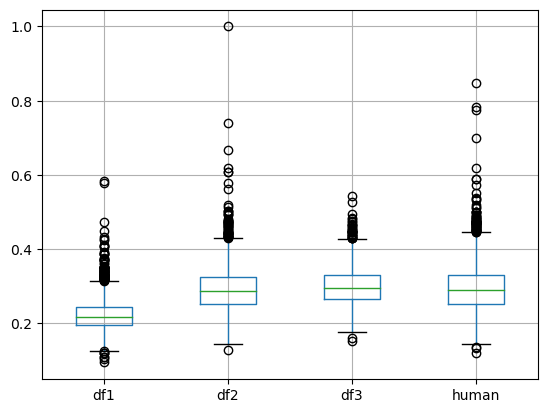

In [27]:
specificity_df.boxplot()

In [28]:
z_human = np.abs(stats.zscore(human_df['specificity']))
z_human

0       0.106932
1       1.150748
2       0.804581
3       0.136574
4       0.657622
          ...   
2535    1.646568
2536    0.245631
2537    1.705611
2538    0.770029
2539    0.705634
Name: specificity, Length: 2540, dtype: float64

In [29]:
human_outliers = z_human[z_human > z_thresh].index 
spec_human_no_outliers = human_df[~human_df.index.isin(human_outliers)].specificity
spec_human_no_outliers

0       0.303654
1       0.220178
2       0.349959
3       0.305621
4       0.340205
          ...   
2535    0.187269
2536    0.280253
2537    0.409763
2538    0.347666
2539    0.249721
Name: specificity, Length: 2521, dtype: float64

In [30]:
print(files[0], 'vs. human')
print(stats.ttest_ind(spec_df1_no_outliers, spec_human_no_outliers, permutations=10000, random_state=34, equal_var=False))

print('\n', files[1], 'vs. human')
print(stats.ttest_ind(spec_df2_no_outliers, spec_human_no_outliers, permutations=10000, random_state=34, equal_var=False))


print('\n', files[2], 'vs. human')
print(stats.ttest_ind(spec_df3_no_outliers, spec_human_no_outliers, permutations=10000, random_state=34, equal_var=False))

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. human
TtestResult(statistic=-50.80927543346678, pvalue=9.999000099990002e-05, df=nan)

 preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt vs. human
TtestResult(statistic=-2.065563921771113, pvalue=0.03899610038996101, df=nan)

 preds_dlrxxx_zephyr-7b-sft-full_specificity.txt vs. human
TtestResult(statistic=2.5655188679845686, pvalue=0.0115988401159884, df=nan)


In [31]:
print(files[0], 'vs. human')
print(stats.ttest_ind(df1.specificity, human_df.specificity, permutations=10000, random_state=34, equal_var=False))

print('\n', files[1], 'vs. human')
print(stats.ttest_ind(df2.specificity, human_df.specificity, permutations=10000, random_state=34, equal_var=False))


print('\n', files[2], 'vs. human')
print(stats.ttest_ind(df3.specificity, human_df.specificity, permutations=10000, random_state=34, equal_var=False))

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. human
TtestResult(statistic=-46.74641853773337, pvalue=9.999000099990002e-05, df=nan)

 preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt vs. human
TtestResult(statistic=-1.9503185806325076, pvalue=0.052394760523947606, df=nan)

 preds_dlrxxx_zephyr-7b-sft-full_specificity.txt vs. human
TtestResult(statistic=1.7120996944823803, pvalue=0.08749125087491251, df=nan)


In [32]:
print(files[0], 'vs.', files[1])
print(stats.ttest_ind(df1.specificity, df2.specificity, permutations=10000, random_state=34, equal_var=False))
print()

print(files[0], 'vs.', files[2])
print(stats.ttest_ind(df1.specificity, df3.specificity, permutations=10000, random_state=34, equal_var=False))


print('\n', files[1], files[2])
print(stats.ttest_ind(df2.specificity, df3.specificity, permutations=10000, random_state=34, equal_var=False))

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt
TtestResult(statistic=-47.26486191439801, pvalue=9.999000099990002e-05, df=nan)

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. preds_dlrxxx_zephyr-7b-sft-full_specificity.txt
TtestResult(statistic=-58.00464341980431, pvalue=9.999000099990002e-05, df=nan)

 preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt preds_dlrxxx_zephyr-7b-sft-full_specificity.txt
TtestResult(statistic=-4.0369238880108735, pvalue=9.999000099990002e-05, df=nan)


In [34]:
print(files[0], 'vs.', files[1])
print(stats.ttest_ind(spec_df1_no_outliers, spec_df2_no_outliers, permutations=10000, random_state=34, equal_var=False))
print()

print(files[0], 'vs.', files[2])
print(stats.ttest_ind(spec_df1_no_outliers, spec_df3_no_outliers, permutations=10000, random_state=34, equal_var=False))


print('\n', files[1], files[2])
print(stats.ttest_ind(spec_df2_no_outliers, spec_df3_no_outliers, permutations=10000, random_state=34, equal_var=False))

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt
TtestResult(statistic=-51.96268774054311, pvalue=9.999000099990002e-05, df=nan)

preds_dlrxxx_zephyr-7b-sft-full122_specificity.txt vs. preds_dlrxxx_zephyr-7b-sft-full_specificity.txt
TtestResult(statistic=-62.355592034075826, pvalue=9.999000099990002e-05, df=nan)

 preds_dlr1e6_zephyr-7b-sft-full122_d211_specificity.txt preds_dlrxxx_zephyr-7b-sft-full_specificity.txt
TtestResult(statistic=-5.04271070259378, pvalue=9.999000099990002e-05, df=nan)
